## Data Preprocessing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income')

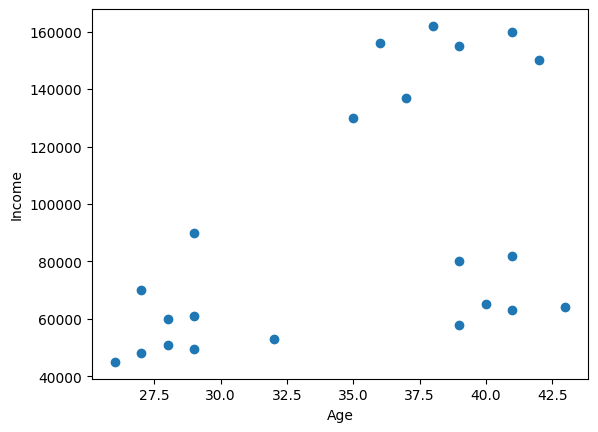

In [4]:
plt.scatter(df.Age,df['Income'])
plt.xlabel('Age')
plt.ylabel('Income')

## Model Train

In [5]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [6]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income,cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


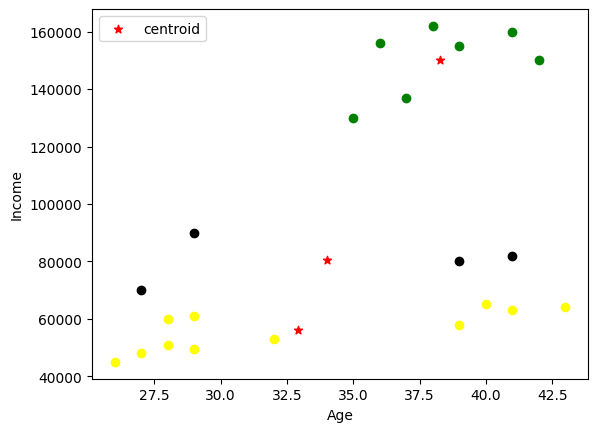

In [7]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income'],color='green')
plt.scatter(df2.Age,df2['Income'],color='yellow')
plt.scatter(df3.Age,df3['Income'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

## Preprocessing using min max scaler

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df['Income'] = scaler.fit_transform(df[['Income']])
df['Age'] = scaler.fit_transform(df[['Age']])
 

In [9]:
df.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


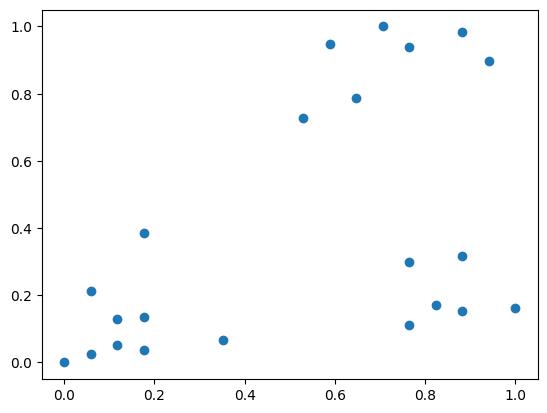

In [10]:
plt.scatter(df.Age,df['Income'])
plt.show()

In [11]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [12]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


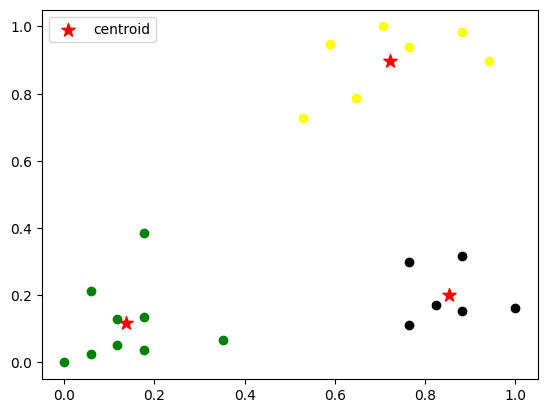

In [13]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income'],color='green')
plt.scatter(df2.Age,df2['Income'],color='Yellow')
plt.scatter(df3.Age,df3['Income'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red',marker='*',label='centroid', s = 100)
plt.legend()
plt.show()

## Elbow Plot

In [14]:
mse = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income']])
    mse.append(km.inertia_)

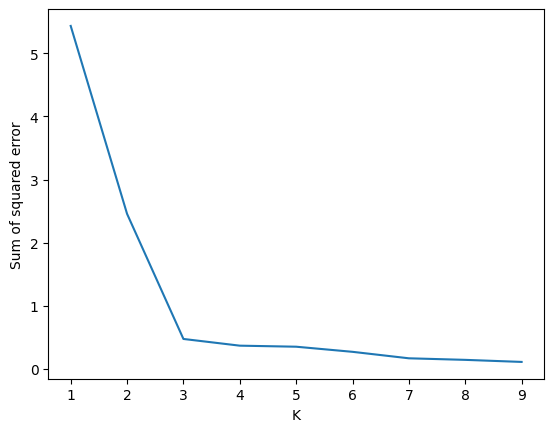

In [15]:
plt.plot(k_range,mse)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()